In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
df=pd.read_csv("diabetes.csv")

In [131]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [132]:
df.shape

(768, 9)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [134]:
# cheking for nan values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [135]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


form the above discription we can see that there are several columns like (Glucose,BloodPressure,SkinThickness,Insulin,BMI) which have minimum value as zero, which is logically not possible.


In [136]:
# Let's replace these zero values with the respective feature's mean value
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

<AxesSubplot: >

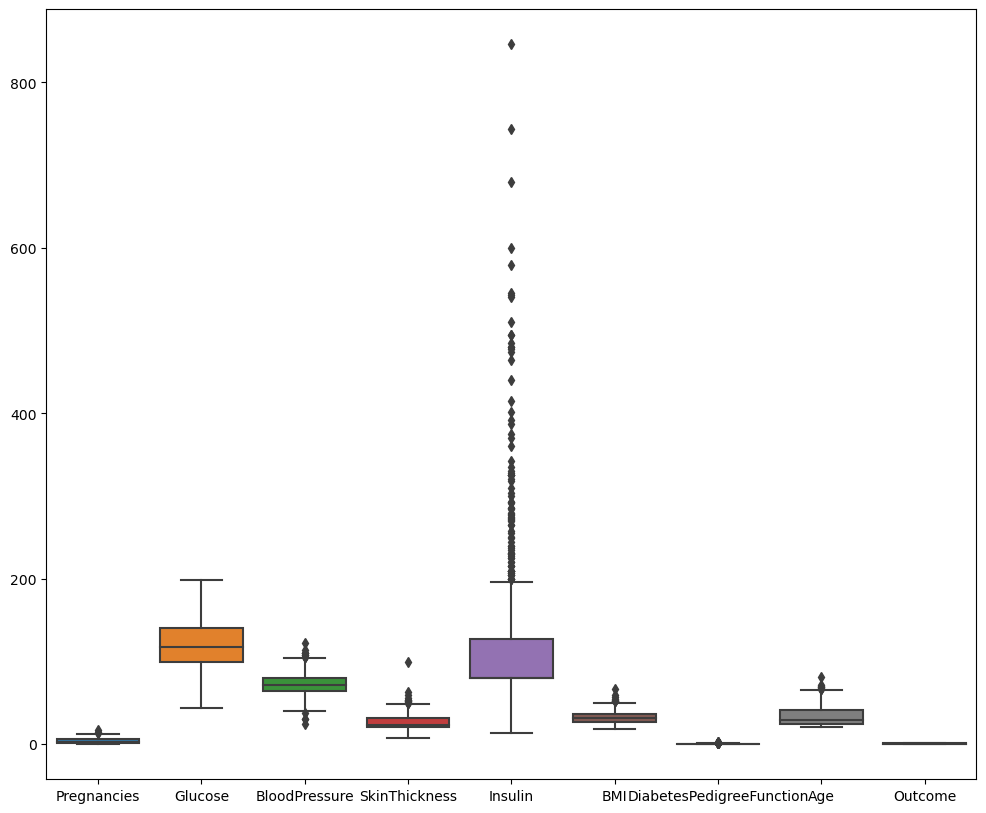

In [137]:
## cheking for outliers
plt.figure(figsize=(12,10))
sns.boxplot(df)

In [138]:
# let's Remove the outliers from the dataset using IQR method
def remove_outliers(df):
    col=df.columns
    for i in col:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        iqr=Q3-Q1
        lower_limit=Q1-1.5*iqr
        upper_limit=Q3+1.5*iqr
        #print(lower_limit,upper_limit)
        df = df[(df[i]>=lower_limit) & (df[i]<=upper_limit)]
    return df
    

In [139]:
# removing outliers
df_cleaned=remove_outliers(df)

In [140]:
df_cleaned.shape,df.shape

((603, 9), (768, 9))

In [141]:
# Independent and Dependent features
X=df_cleaned.iloc[:,:-1]
y=df_cleaned.iloc[:,-1]

In [142]:
# segregate the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [143]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((482, 8), (121, 8), (482,), (121,))

In [144]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=42)

In [145]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[i for i in range(10)],
    'max_features':['auto','sqrt','log2'],
}

In [146]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
## Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(classifier,param_grid=parameter,cv=2,scoring='accuracy')

In [148]:
clf.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [149]:
clf.best_score_

0.7676348547717842

In [150]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [151]:
y_pred=clf.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
print(accuracy_score(y_pred,y_test))
metrix=confusion_matrix(y_pred,y_test)
print(metrix)
print(recall_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(f1_score(y_pred,y_test))

0.7933884297520661
[[69 17]
 [ 8 27]]
0.7714285714285715
0.6136363636363636
0.6835443037974683


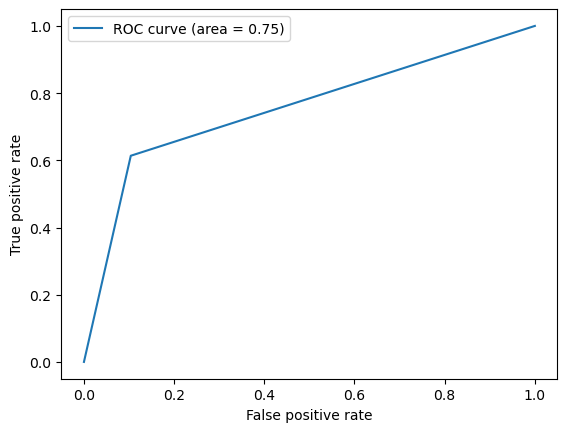

In [153]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="ROC curve (area = {0:.2f})".format(roc_auc))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [157]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [158]:
from sklearn import tree

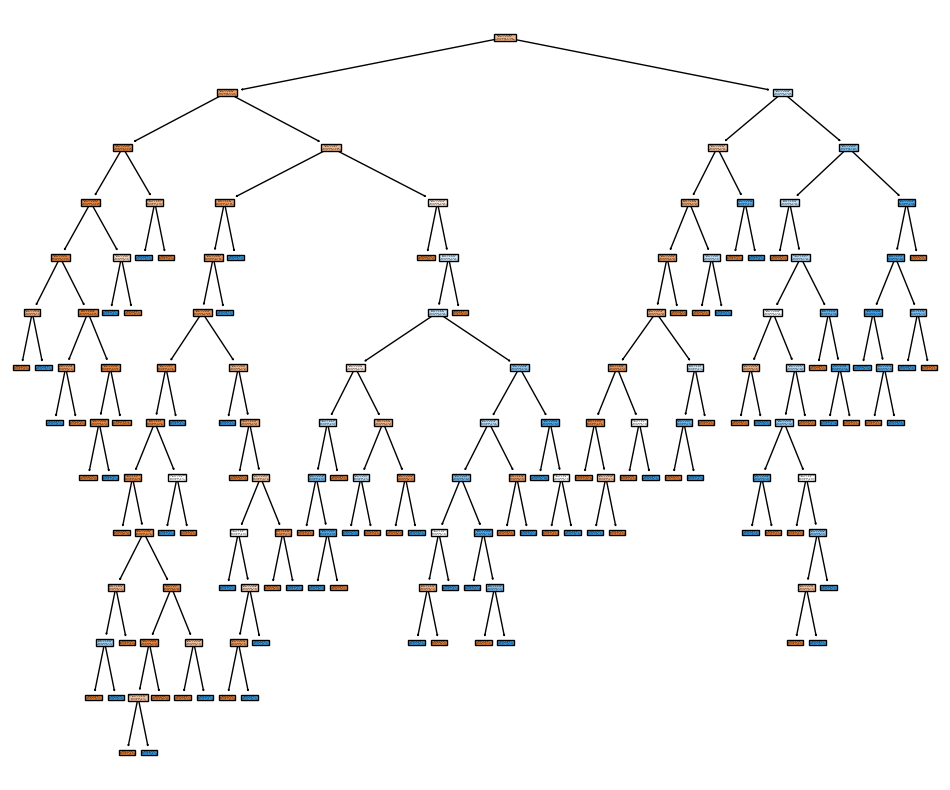

In [159]:
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)
plt.show()

In [160]:
## Testing a model on the new Data
clf.predict([[7,140,72,35,150,32,0.6,50]])

array([1])